In [34]:
import numpy as np # 행렬계산
import pandas as pd # 엑셀 
from datetime import datetime, timedelta
import re
from dateutil.parser import parse
import math
import glob # 파일 로드 
import sys
import openpyxl as opx # 엑셀파일 로드 (xls)
import xlrd # 엑셀파일 로드 (최신버전 xlsx)
import seaborn as sns
import random
import matplotlib # Graph
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import font_manager, rc
# matplotlib.rcParams['axes.unicode_minus'] = False
# font_path = "C:/Windows/Fonts/malgun.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
# %matplotlib inline


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# PV데이터 로딩

## CSV 파일 concat
- header 확인 

In [2]:
files = glob.glob('./raw_data/pv/*.csv')

all_data = pd.DataFrame()

for f in files:
    data = pd.read_csv(f, header=15)  # 데이터를 판다스로 리드      
    df = pd.DataFrame(data)    # 데이터프레임을 불러온 데이터로 선언
    all_data = pd.concat([all_data, df]) # 데이터 프레임 concat
    print(f, all_data.shape) # print 문 
all_data


./raw_data/pv\06240000.CSV (7, 29)
./raw_data/pv\06240400.CSV (32, 29)
./raw_data/pv\06290000.CSV (35, 29)
./raw_data/pv\06290100.CSV (38, 29)
./raw_data/pv\06290200.CSV (109, 29)
./raw_data/pv\06300000.CSV (399, 29)
./raw_data/pv\07010000.CSV (605, 29)
./raw_data/pv\07010400.CSV (3059, 29)
./raw_data/pv\07030000.CSV (4757, 29)
./raw_data/pv\07030001.CSV (5757, 29)
./raw_data/pv\07120000.CSV (5960, 29)
./raw_data/pv\07120001.CSV (13152, 29)
./raw_data/pv\08070000.CSV (17826, 29)
./raw_data/pv\08070001.CSV (17833, 29)


Date       Etime  Status  Freq_Avg[Hz]  U1_Avg[V]  \
0   2023-06-24 12:40:00         NaN     NaN           NaN        NaN   
1   2023-06-24 12:45:00  0000:05:00     0.0        60.034     218.87   
2   2023-06-24 12:50:00  0000:10:00     0.0        60.033     218.96   
3   2023-06-24 12:55:00  0000:15:00     0.0        60.008     219.03   
4   2023-06-24 13:00:00  0000:20:00     0.0        60.003     218.54   
..                  ...         ...     ...           ...        ...   
2   2023-08-23 15:20:00  0389:40:00     0.0        50.108     212.80   
3   2023-08-23 15:25:00  0389:45:00     0.0        50.119     213.62   
4   2023-08-23 15:30:00  0389:50:00     0.0        50.153     216.91   
5   2023-08-23 15:34:16  0389:54:16     0.0        50.212     215.20   
6   2023-08-23 15:34:16        STOP     NaN           NaN        NaN   

    Ufnd1_Avg[V]  Udeg1_Avg[deg]  I1_Avg[A]  Ifnd1_Avg[A]  Ideg1_Avg[deg]  \
0            NaN             NaN        NaN           NaN             NaN   
1         218.81             0.0       3.49          3.48           10.29   
2         218.90             0.0       3.49          3.48           10.29   
3         218.96             0.0       3.49          3.48           10.29   
4         218.49             0.0       3.49          3.49           10.24   
..           ...             ...        ...           ...             ...   
2         212.60             0.0       3.55          3.33           -3.50   
3         213.44             0.0       9.37          9.35           -2.73   
4         216.74             0.0       8.14          8.06           -2.86   
5         215.03             0.0       8.23          8.21           -3.23   
6            NaN             NaN        NaN           NaN             NaN   

    ...  WP+dem1[Wh]  WP-dem1[Wh]  WQLAGdem1[varh]  WQLEADdem1[varh]  \
0   ...          NaN          NaN              NaN               NaN   
1   ...         62.0          0.0              0.0             -12.0   
2   ...         62.0          0.0              0.0             -12.0   
3   ...         62.0          0.0              0.0             -12.0   
4   ...         62.0          0.0              0.0             -12.0   
..  ...          ...          ...              ...               ...   
2   ...         59.0          0.0             20.0              -0.0   
3   ...        166.0          0.0             15.0              -0.0   
4   ...        145.0          0.0             22.0               0.0   
5   ...        125.0          0.0             12.0               0.0   
6   ...          NaN          NaN              NaN               NaN   

    Pdem+1[W]  Pdem-1[W]  QdemLAG1[var]  QdemLEAD1[var]  PFdem1  Pulse  
0         NaN        NaN            NaN             NaN     NaN    NaN  
1       750.0        0.0            0.0          -150.0  1.0000    0.0  
2       750.0        0.0            0.0          -150.0  1.0000    0.0  
3       750.0        0.0            0.0          -150.0  1.0000    0.0  
4       750.0        0.0            0.0          -150.0  1.0000    0.0  
..        ...        ...            ...             ...     ...    ...  
2       710.0        0.0          250.0            -0.0  0.9450    0.0  
3      1990.0        0.0          180.0            -0.0  0.9957    0.0  
4      1740.0        0.0          260.0             0.0  0.9890    0.0  
5      1500.0        0.0          150.0             0.0  0.9953    0.0  
6         NaN        NaN            NaN             NaN     NaN    NaN  

[17833 rows x 29 columns]

In [3]:
df=all_data

## 인덱스 시간으로 변경

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df.set_index('Date')

## Object 컬럼 drop

In [6]:
df.drop(columns=['Etime'], inplace=True)

## NaN 행 드랍

In [7]:
df = df.dropna()

In [8]:
df

Status  Freq_Avg[Hz]  U1_Avg[V]  Ufnd1_Avg[V]  \
Date                                                                 
2023-06-24 12:45:00     0.0        60.034     218.87        218.81   
2023-06-24 12:50:00     0.0        60.033     218.96        218.90   
2023-06-24 12:55:00     0.0        60.008     219.03        218.96   
2023-06-24 13:00:00     0.0        60.003     218.54        218.49   
2023-06-24 13:02:34     0.0        59.980     217.85        217.79   
...                     ...           ...        ...           ...   
2023-08-23 15:15:00     0.0        50.119     213.01        212.82   
2023-08-23 15:20:00     0.0        50.108     212.80        212.60   
2023-08-23 15:25:00     0.0        50.119     213.62        213.44   
2023-08-23 15:30:00     0.0        50.153     216.91        216.74   
2023-08-23 15:34:16     0.0        50.212     215.20        215.03   

                     Udeg1_Avg[deg]  I1_Avg[A]  Ifnd1_Avg[A]  Ideg1_Avg[deg]  \
Date                                                                           
2023-06-24 12:45:00             0.0       3.49          3.48           10.29   
2023-06-24 12:50:00             0.0       3.49          3.48           10.29   
2023-06-24 12:55:00             0.0       3.49          3.48           10.29   
2023-06-24 13:00:00             0.0       3.49          3.49           10.24   
2023-06-24 13:02:34             0.0       3.50          3.50           10.17   
...                             ...        ...           ...             ...   
2023-08-23 15:15:00             0.0      13.90         13.84           -2.18   
2023-08-23 15:20:00             0.0       3.55          3.33           -3.50   
2023-08-23 15:25:00             0.0       9.37          9.35           -2.73   
2023-08-23 15:30:00             0.0       8.14          8.06           -2.86   
2023-08-23 15:34:16             0.0       8.23          8.21           -3.23   

                     P1_Avg[W]  S1_Avg[VA]  ...  WP+dem1[Wh]  WP-dem1[Wh]  \
Date                                        ...                             
2023-06-24 12:45:00      750.0       760.0  ...         62.0          0.0   
2023-06-24 12:50:00      750.0       760.0  ...         62.0          0.0   
2023-06-24 12:55:00      750.0       760.0  ...         62.0          0.0   
2023-06-24 13:00:00      750.0       760.0  ...         62.0          0.0   
2023-06-24 13:02:34      750.0       760.0  ...         32.0          0.0   
...                        ...         ...  ...          ...          ...   
2023-08-23 15:15:00     2950.0      2960.0  ...        245.0          0.0   
2023-08-23 15:20:00      710.0       760.0  ...         59.0          0.0   
2023-08-23 15:25:00     1990.0      2000.0  ...        166.0          0.0   
2023-08-23 15:30:00     1740.0      1770.0  ...        145.0          0.0   
2023-08-23 15:34:16     1760.0      1770.0  ...        125.0          0.0   

                     WQLAGdem1[varh]  WQLEADdem1[varh]  Pdem+1[W]  Pdem-1[W]  \
Date                                                                           
2023-06-24 12:45:00              0.0             -12.0      750.0        0.0   
2023-06-24 12:50:00              0.0             -12.0      750.0        0.0   
2023-06-24 12:55:00              0.0             -12.0      750.0        0.0   
2023-06-24 13:00:00              0.0             -12.0      750.0        0.0   
2023-06-24 13:02:34              0.0              -6.0      380.0        0.0   
...                              ...               ...        ...        ...   
2023-08-23 15:15:00             22.0              -0.0     2940.0        0.0   
2023-08-23 15:20:00             20.0              -0.0      710.0        0.0   
2023-08-23 15:25:00             15.0              -0.0     1990.0        0.0   
2023-08-23 15:30:00             22.0               0.0     1740.0        0.0   
2023-08-23 15:34:16             12.0               0.0     1500.0        0.0   

                     QdemL

## 1차 visualization

C:\Users\User\AppData\Local\Temp\ipykernel_35692\2084333749.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df.columns), 1, i+1)


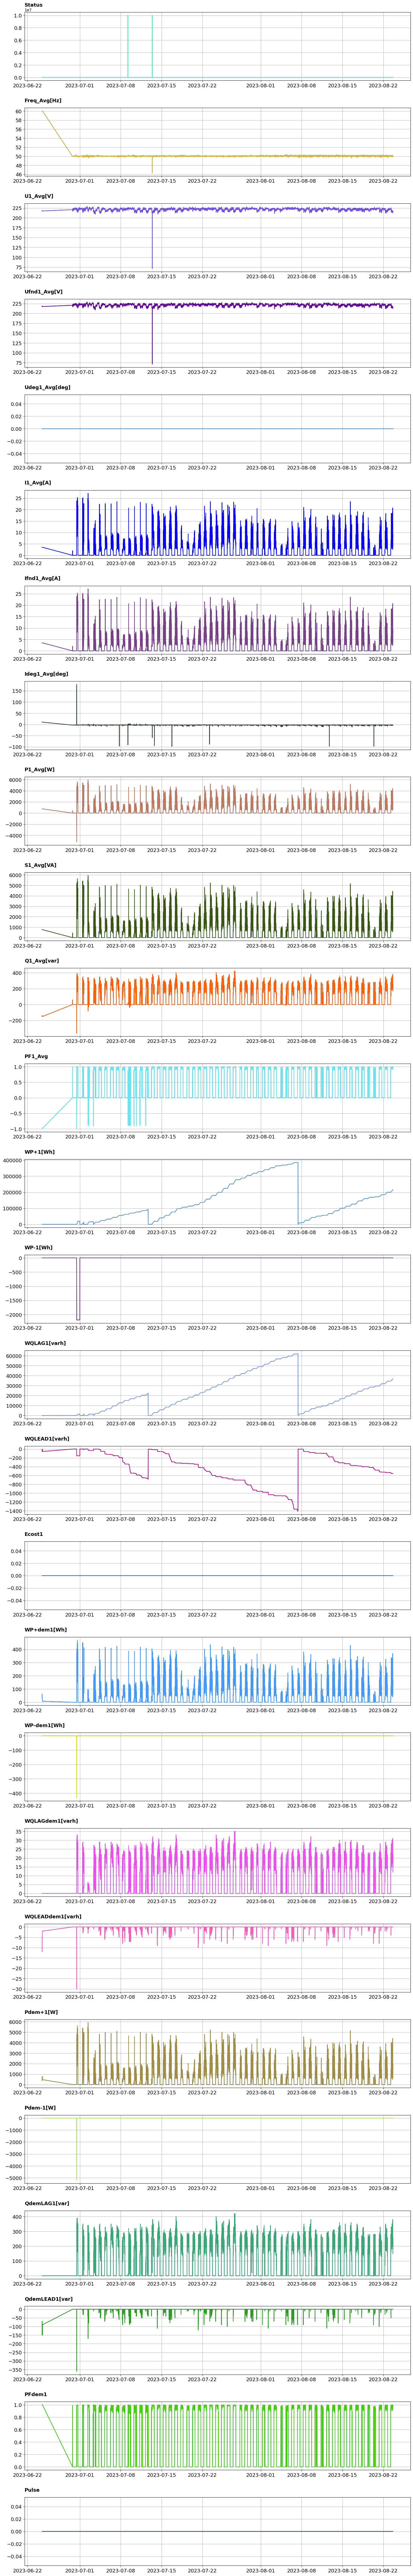

In [9]:
fig, ax = plt.subplots(figsize=(18,120))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)
    plt.plot(df[name])    
    plt.plot(df[name], color=color)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2022-04-20 00:00:00'), pd.Timestamp('2023-05-31 00:00:00'))    
    plt.grid(True)
plt.show()
fig.tight_layout()


# 데이터 전처리
- outlier 제거
- 수식 적용 (Ex. 효율, 적산값 변환 등 )
- 1일, 1달 단위로 리샘플링

## Mask

In [10]:
# columns 값 복붙하기 위해 list로 print
df.columns.to_list()

['Status',
 'Freq_Avg[Hz]',
 'U1_Avg[V]',
 'Ufnd1_Avg[V]',
 'Udeg1_Avg[deg]',
 'I1_Avg[A]',
 'Ifnd1_Avg[A]',
 'Ideg1_Avg[deg]',
 'P1_Avg[W]',
 'S1_Avg[VA]',
 'Q1_Avg[var]',
 'PF1_Avg',
 'WP+1[Wh]',
 'WP-1[Wh]',
 'WQLAG1[varh]',
 'WQLEAD1[varh]',
 'Ecost1',
 'WP+dem1[Wh]',
 'WP-dem1[Wh]',
 'WQLAGdem1[varh]',
 'WQLEADdem1[varh]',
 'Pdem+1[W]',
 'Pdem-1[W]',
 'QdemLAG1[var]',
 'QdemLEAD1[var]',
 'PFdem1',
 'Pulse']

In [11]:
# U1_AVg 200 미만이거나, status (오류상태, 0=정상) 가 0이아니면 outlier로 취급하겠다 
mask =  (df['U1_Avg[V]']< 200)|(df['Status'] != 0)

In [12]:
df_mask = df[mask]

In [13]:
df_mask

Status  Freq_Avg[Hz]  U1_Avg[V]  Ufnd1_Avg[V]  \
Date                                                                     
2023-07-09 05:55:00  10000000.0        50.044     222.94        222.89   
2023-07-13 10:10:00         0.0        49.890     113.86        113.62   
2023-07-13 10:15:00  10000000.0        46.301      71.40         71.22   

                     Udeg1_Avg[deg]  I1_Avg[A]  Ifnd1_Avg[A]  Ideg1_Avg[deg]  \
Date                                                                           
2023-07-09 05:55:00             0.0       0.10          0.01          -90.95   
2023-07-13 10:10:00             0.0       5.78          5.65          -32.80   
2023-07-13 10:15:00             0.0       2.16          1.91          -59.01   

                     P1_Avg[W]  S1_Avg[VA]  ...  WP+dem1[Wh]  WP-dem1[Wh]  \
Date                                        ...                             
2023-07-09 05:55:00        0.0        20.0  ...          0.0          0.0   
2023-07-13 10:10:00      700.0       710.0  ...         58.0          0.0   
2023-07-13 10:15:00      100.0       100.0  ...          8.0          0.0   

                     WQLAGdem1[varh]  WQLEADdem1[varh]  Pdem+1[W]  Pdem-1[W]  \
Date                                                                           
2023-07-09 05:55:00              1.0               0.0        0.0        0.0   
2023-07-13 10:10:00             12.0              -0.0      700.0        0.0   
2023-07-13 10:15:00              1.0              -0.0       90.0        0.0   

                     QdemLAG1[var]  QdemLEAD1[var]  PFdem1  Pulse  
Date                                                               
2023-07-09 05:55:00           10.0             0.0  0.0170    0.0  
2023-07-13 10:10:00          150.0            -0.0  0.9785    0.0  
2023-07-13 10:15:00           20.0            -0.0  0.9828    0.0  

[3 rows x 27 columns]

In [14]:
df = df[~mask]

## 2차 visualization

C:\Users\User\AppData\Local\Temp\ipykernel_35692\2274047944.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df.columns), 1, i+1)


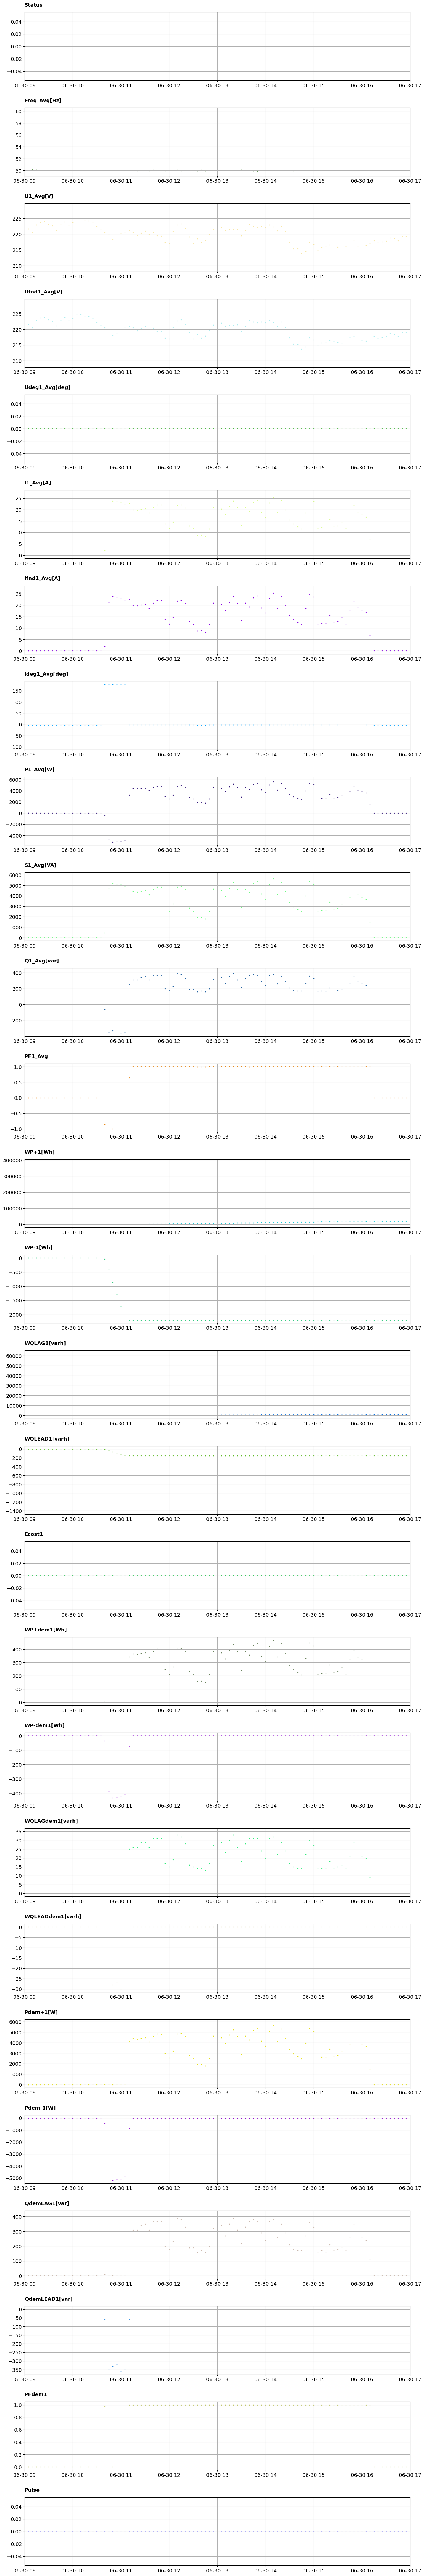

In [15]:
fig, ax = plt.subplots(figsize=(18,120))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)
#     plt.plot(df[name])    
    plt.scatter(df.index, df[name], color=color, s=2.5)    
#     plt.plot(df[name], color=color)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
    plt.xlim(pd.Timestamp('2023-06-30 09:00:00'), pd.Timestamp('2023-06-30 17:00:00'))    
    plt.grid(True)
plt.show()
fig.tight_layout()


## 7월1일부터 데이터 저장주기 (5분->1분)으로 변경됨 
- Resampling을 1분단위
- 사이 값들은 보간 

In [16]:
# 1분 간격으로 resampling (평균값)
df_1min = df.resample('1T').mean()

In [17]:
# 7월 1일 이전 5분 간격 데이터가 1분단위로 resample되면서 NaN생기는데 이 값들은 보간을 함 
df_1min = df_1min.interpolate()

In [18]:
df = df_1min

## 3차 visualization

C:\Users\User\AppData\Local\Temp\ipykernel_35692\1929388445.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df.columns), 1, i+1)


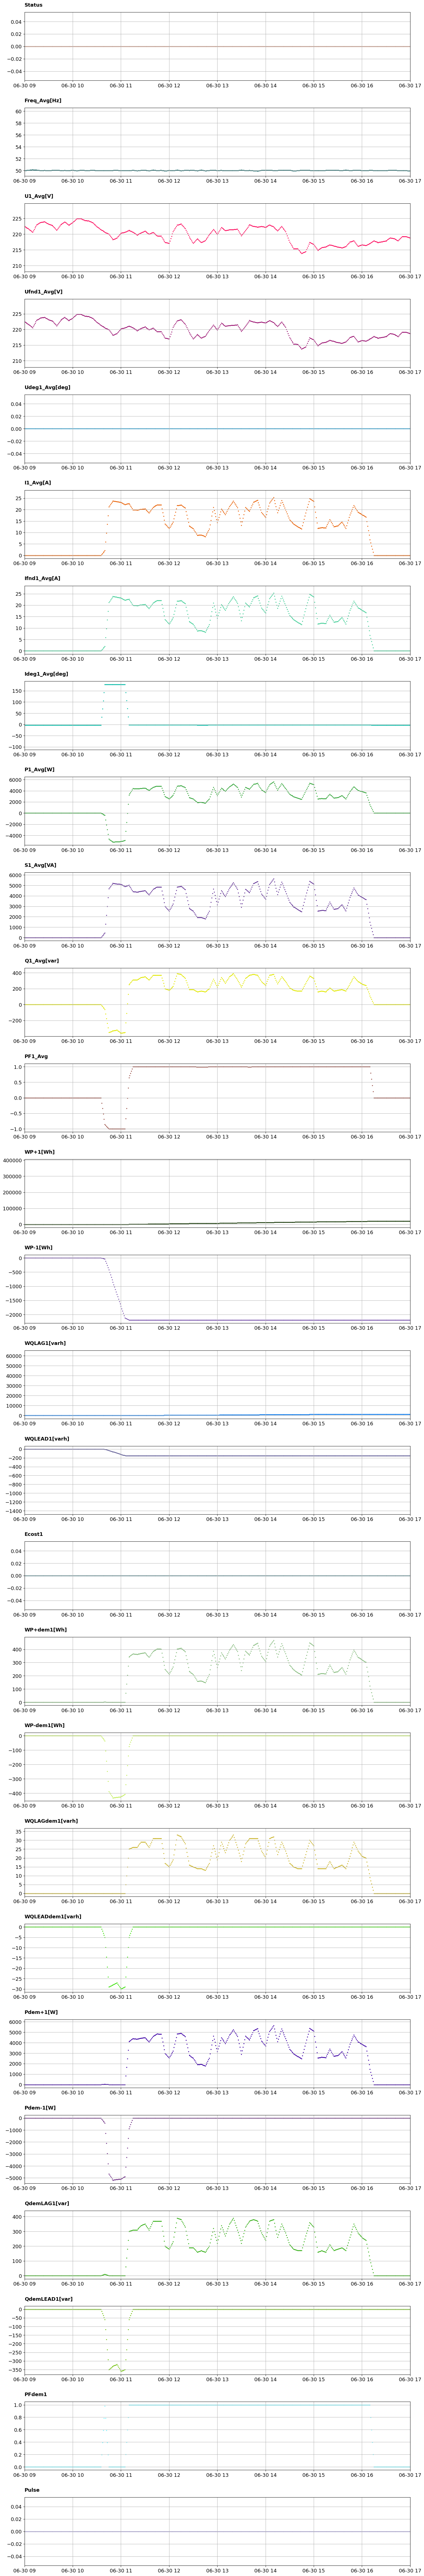

In [19]:
fig, ax = plt.subplots(figsize=(18,120))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)
#     plt.plot(df[name])    
#     plt.plot(df[name], color=color)    
    plt.scatter(df.index, df[name], color=color, s=2.5)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
    plt.xlim(pd.Timestamp('2023-06-30 09:00:00'), pd.Timestamp('2023-06-30 17:00:00'))   
    plt.grid(True)
plt.show()
fig.tight_layout()


## 누적전력량 계산

In [20]:
df['P1_Energy[kWh]'] = df['P1_Avg[W]'].cumsum()/60/1000
df['Pdem+1_Energy[kWh]'] = df['Pdem+1[W]'].cumsum()/60/1000
df['Total[kWh]'] = df['P1_Energy[kWh]'] + df['Pdem+1_Energy[kWh]']

In [21]:
df

Status  Freq_Avg[Hz]  U1_Avg[V]  Ufnd1_Avg[V]  \
Date                                                                 
2023-06-24 12:45:00     0.0      60.03400   218.8700      218.8100   
2023-06-24 12:46:00     0.0      60.03380   218.8880      218.8280   
2023-06-24 12:47:00     0.0      60.03360   218.9060      218.8460   
2023-06-24 12:48:00     0.0      60.03340   218.9240      218.8640   
2023-06-24 12:49:00     0.0      60.03320   218.9420      218.8820   
...                     ...           ...        ...           ...   
2023-08-23 15:30:00     0.0      50.15300   216.9100      216.7400   
2023-08-23 15:31:00     0.0      50.16775   216.4825      216.3125   
2023-08-23 15:32:00     0.0      50.18250   216.0550      215.8850   
2023-08-23 15:33:00     0.0      50.19725   215.6275      215.4575   
2023-08-23 15:34:00     0.0      50.21200   215.2000      215.0300   

                     Udeg1_Avg[deg]  I1_Avg[A]  Ifnd1_Avg[A]  Ideg1_Avg[deg]  \
Date                                                                           
2023-06-24 12:45:00             0.0     3.4900        3.4800         10.2900   
2023-06-24 12:46:00             0.0     3.4900        3.4800         10.2900   
2023-06-24 12:47:00             0.0     3.4900        3.4800         10.2900   
2023-06-24 12:48:00             0.0     3.4900        3.4800         10.2900   
2023-06-24 12:49:00             0.0     3.4900        3.4800         10.2900   
...                             ...        ...           ...             ...   
2023-08-23 15:30:00             0.0     8.1400        8.0600         -2.8600   
2023-08-23 15:31:00             0.0     8.1625        8.0975         -2.9525   
2023-08-23 15:32:00             0.0     8.1850        8.1350         -3.0450   
2023-08-23 15:33:00             0.0     8.2075        8.1725         -3.1375   
2023-08-23 15:34:00             0.0     8.2300        8.2100         -3.2300   

                     P1_Avg[W]  S1_Avg[VA]  ...  WQLEADdem1[varh]  Pdem+1[W]  \
Date                                        ...                                
2023-06-24 12:45:00      750.0       760.0  ...             -12.0      750.0   
2023-06-24 12:46:00      750.0       760.0  ...             -12.0      750.0   
2023-06-24 12:47:00      750.0       760.0  ...             -12.0      750.0   
2023-06-24 12:48:00      750.0       760.0  ...             -12.0      750.0   
2023-06-24 12:49:00      750.0       760.0  ...             -12.0      750.0   
...                        ...         ...  ...               ...        ...   
2023-08-23 15:30:00     1740.0      1770.0  ...               0.0     1740.0   
2023-08-23 15:31:00     1745.0      1770.0  ...               0.0     1680.0   
2023-08-23 15:32:00     1750.0      1770.0  ...               0.0     1620.0   
2023-08-23 15:33:00     1755.0      1770.0  ...               0.0     1560.0   
2023-08-23 15:34:00     1760.0      1770.0  ...               0.0     1500.0   

                     Pdem-1[W]  QdemLAG1[var]  QdemLEAD1[var]    PFdem1  \
Date                                                                      
2023-06-24 12:45:00        0.0            0.0          -150.0  1.000000   
2023-06-24 12:46:00        0.0            0.0          -150.0  1.000000   
2023-06-24 12:47:00        0.0            0.0          -150.0  1.000000   
2023-06-24 12:48:00        0.0            0.0          -150.0  1.000000   
2023-06-24 12:49:00        0.0            0.0          -150.0  1.000000   
...                        ...            ...             ...       ...   
2023-08-23 15:30:00        0.0          260.0             0.0  0.989000   
2023-08-23 15:31:00        0.0          232.5             0.0  0.990575   
2023-08-23 15:32:00        0.0          205.0             0.0  0.992150   
2023-08-23 15:33:00        0.0          177.5             0.0  0.993725   
2023-08-23 15:34:00        0.0          150.0             0.0  0.995300   

                     Pulse  P1_Energy[kWh]  Pdem+1_E

C:\Users\User\AppData\Local\Temp\ipykernel_35692\2218143674.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df.columns), 1, i+1)


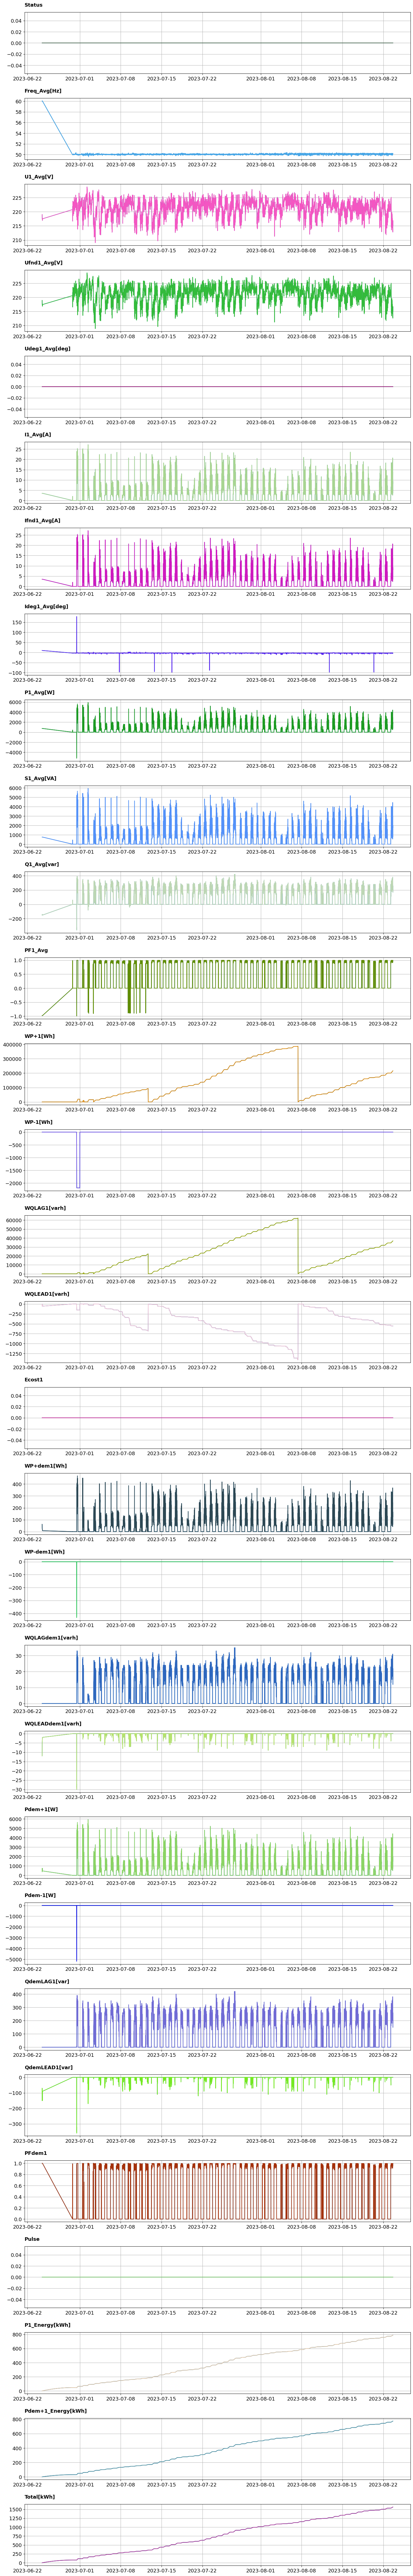

In [22]:
fig, ax = plt.subplots(figsize=(18,120))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)
    plt.plot(df[name])    
    plt.plot(df[name], color=color)    
#     plt.scatter(df.index, df[name], color=color, s=2.5)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2023-06-30 09:00:00'), pd.Timestamp('2023-06-30 17:00:00'))   
    plt.grid(True)
plt.show()
fig.tight_layout()


## 일별 생산량[kWh]으로 변경

In [27]:
df_energy = df[['P1_Avg[W]','Pdem+1[W]']]

In [29]:
df_energy = df_energy.resample('1d').sum()/60

In [40]:
df_energy

P1_Avg[W]     Pdem+1[W]
Date                                  
2023-06-24   8156.922197   5379.337910
2023-06-25  14856.239063   9309.909813
2023-06-26  11367.209584   7123.451339
2023-06-27   7878.180105   4936.992866
2023-06-28   4389.150626   2750.534392
...                  ...           ...
2023-08-19   8335.000000   8336.666667
2023-08-20   3441.666667   3441.666667
2023-08-21  12820.833333  12820.000000
2023-08-22  15229.166667  15230.000000
2023-08-23  16003.000000  15992.166667

[61 rows x 2 columns]

### 일별 생산량 bar chart
- 단위는 Wh인데 바꾸지 않음 변경 주의할 것

C:\Users\User\AppData\Local\Temp\ipykernel_35692\1607606307.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df_energy.columns), 1, i+1)


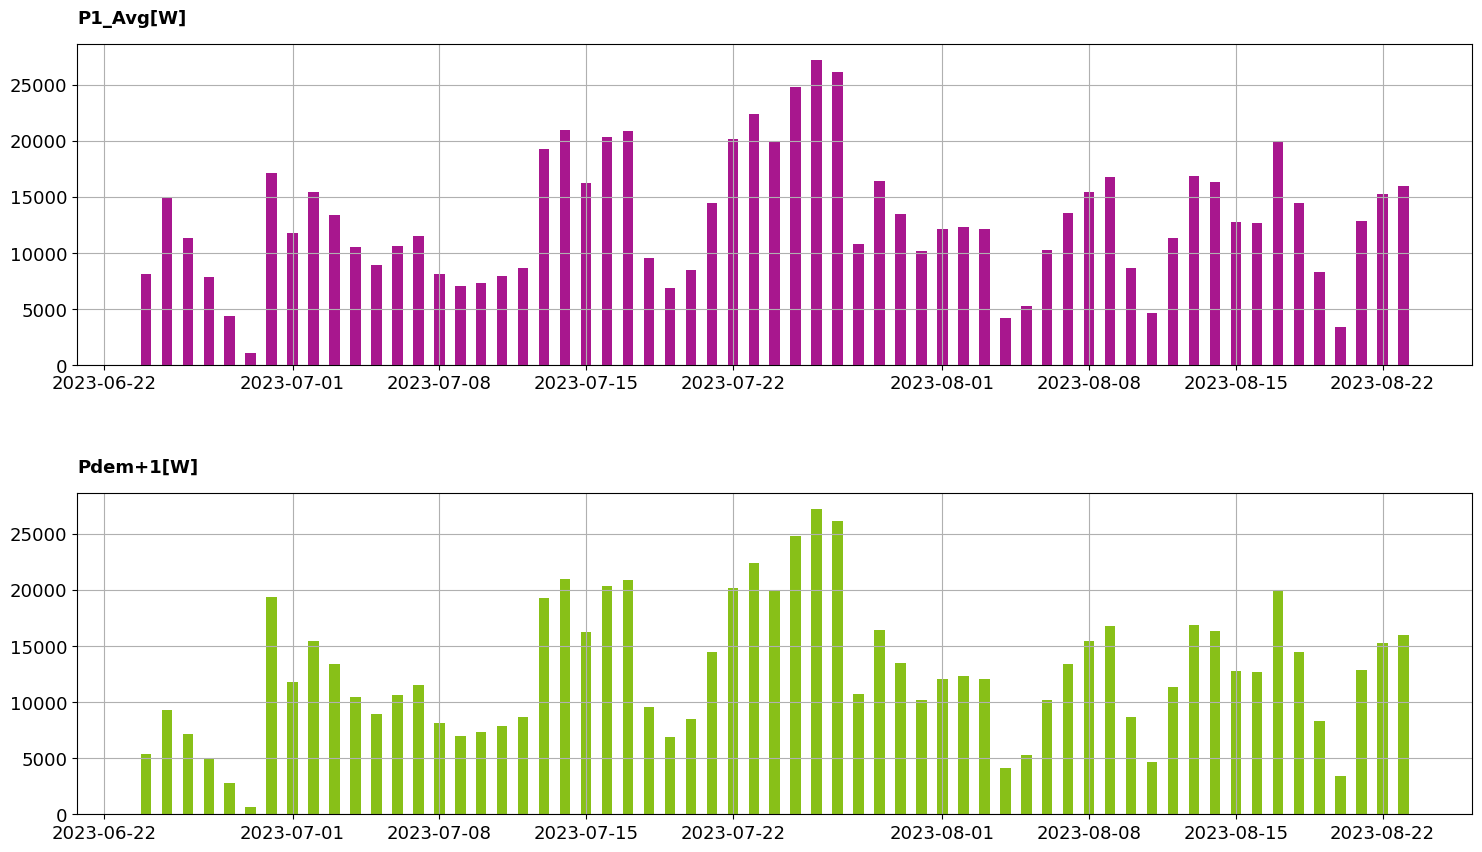

In [44]:
fig, ax = plt.subplots(figsize=(18,10))

for i in range(len(df_energy.columns)):
    plt.subplot(len(df_energy.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df_energy.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)       
    plt.bar(df_energy.index, df_energy[name], color=color, width=0.5)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2022-03-01 00:00:00'), pd.Timestamp('2023-06-30 00:00:00'))    
    plt.grid(True)
# plt.savefig('./figure/pohang_monthlydata.jpeg',dpi=400)
plt.show()
fig.tight_layout()


### 월별 생산량으로 변경

In [31]:
df_energy_1M = df_energy.resample('1M').sum()/60

In [32]:
df_energy_1M

P1_Avg[W]    Pdem+1[W]
Date                                
2023-06-30  1080.802778   824.709722
2023-07-31  7498.074537  7497.425926
2023-08-31  4591.133333  4588.911111

C:\Users\User\AppData\Local\Temp\ipykernel_35692\263752815.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df_energy_1M.columns), 1, i+1)


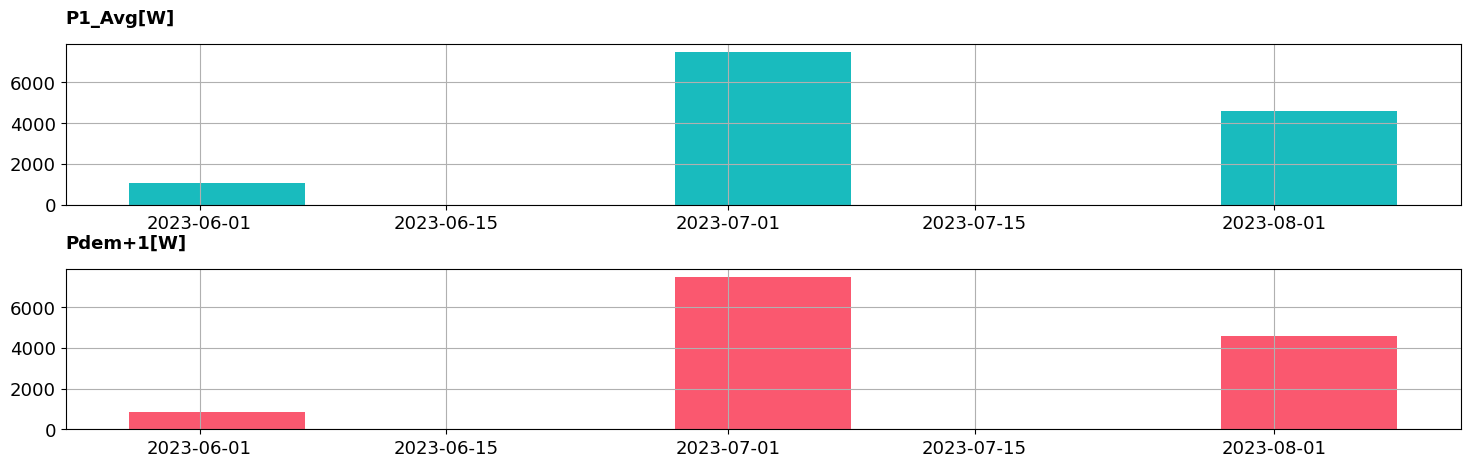

In [39]:
fig, ax = plt.subplots(figsize=(18,5))

for i in range(len(df_energy_1M.columns)):
    plt.subplot(len(df_energy_1M.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df_energy_1M.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)       
    plt.bar(df_energy_1M.index- timedelta(weeks=4), df_energy_1M[name], color=color, width=10)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2022-03-01 00:00:00'), pd.Timestamp('2023-06-30 00:00:00'))    
    plt.grid(True)
# plt.savefig('./figure/pohang_monthlydata.jpeg',dpi=400)
plt.show()
fig.tight_layout()


## 1분, 1일단위 데이터 export

In [46]:
df.to_csv('./1min_concat.csv')
df_energy.to_csv(('./1day_concat.csv'))